<a href="https://colab.research.google.com/github/RASHMI1110/rnn-google-stock-prediction/blob/master/CaseStudy_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IBM_2006-01-01_to_2018-01-01.csv to IBM_2006-01-01_to_2018-01-01.csv


In [ ]:
data = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=["Date"])

data.shape

(3020, 6)

In [ ]:
data.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [ ]:
data.isnull().any().count()

6

In [ ]:
data.isna().any()

Open       True
High      False
Low        True
Close     False
Volume    False
Name      False
dtype: bool

In [ ]:
data.fillna(method='ffill',inplace=True)

In [ ]:
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Name      False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3020 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3020 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
data['Volume'].astype(float)

Date
2006-01-03    11715200.0
2006-01-04     9840600.0
2006-01-05     7213500.0
2006-01-06     8197400.0
2006-01-09     6858200.0
                 ...    
2017-12-22     2990583.0
2017-12-26     2479017.0
2017-12-27     2149257.0
2017-12-28     2687624.0
2017-12-29     3327087.0
Name: Volume, Length: 3020, dtype: float64

# **EDA**

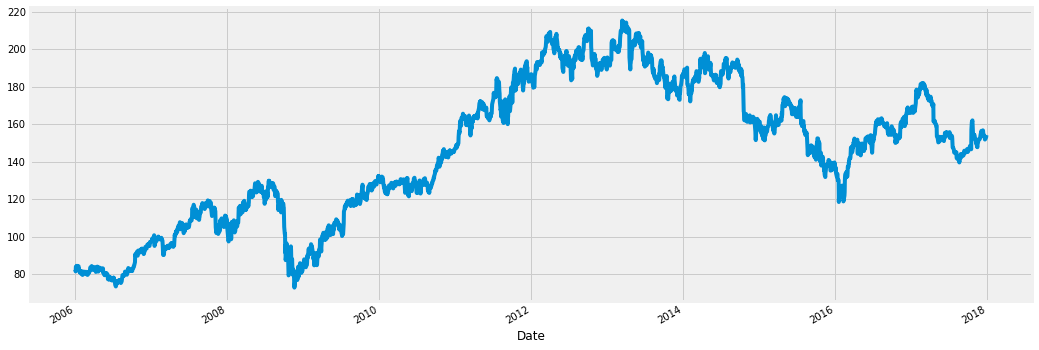

In [ ]:
data['Open'].plot(figsize=(16,6))

In [ ]:
# 7 day rolling mean
data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN
2006-01-10,NaN,NaN,NaN,NaN,NaN
2006-01-11,83.088571,83.737143,82.350000,83.347143,7.900343e+06
2006-01-12,83.284286,83.938571,82.720000,83.562857,6.930529e+06
2006-01-13,83.398571,84.074286,82.887143,83.737143,6.513543e+06


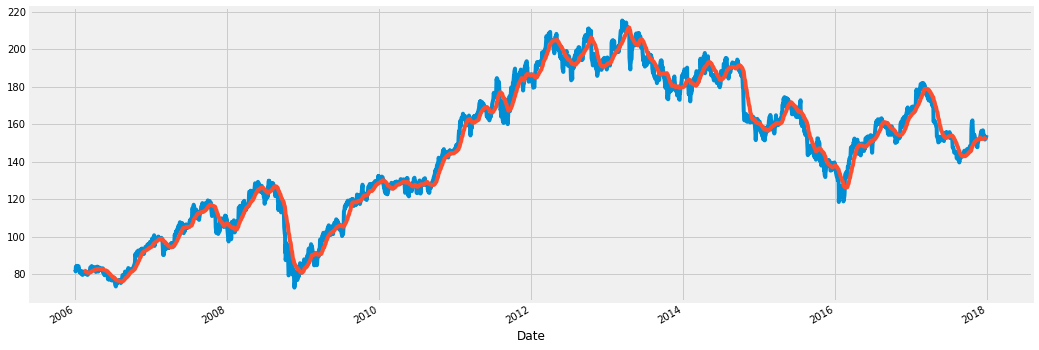

In [ ]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot()

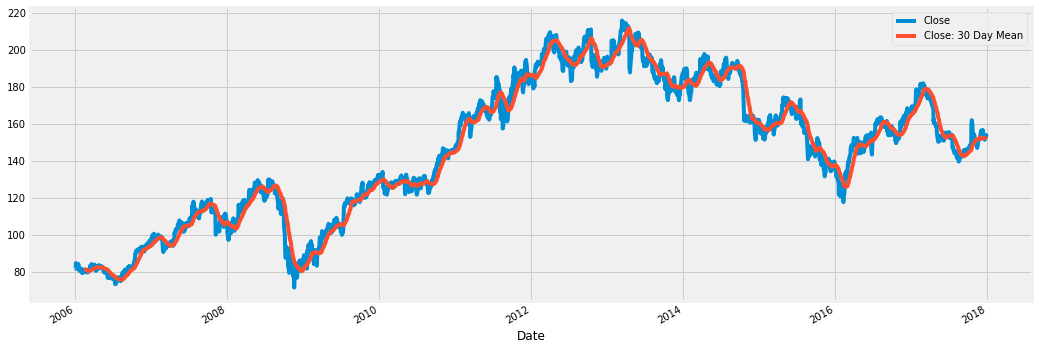

In [ ]:
data['Close: 30 Day Mean'] = data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

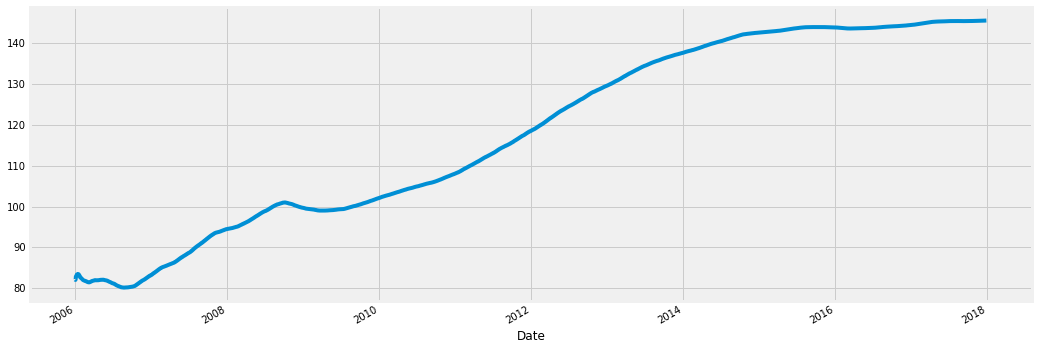

In [ ]:
# Optional specify a minimum number of periods
data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

**Correlation** **Analysis**

In [ ]:
X=data
X=X.drop(['Close'],axis=1)

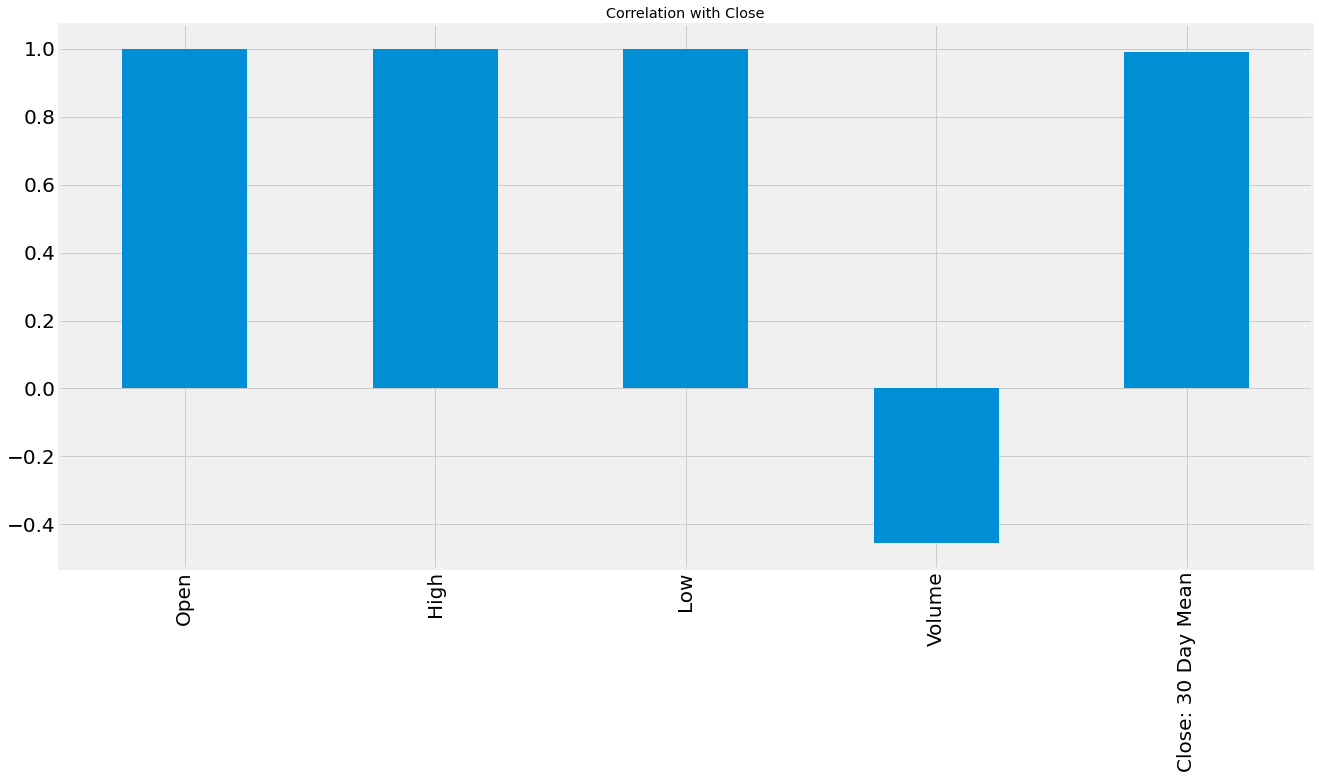

In [ ]:
X.corrwith(data['Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Close", fontsize = 20,    #checking correlation
        rot = 90, grid = True)

In [ ]:
train = data[:'2016'].iloc[:,1:2].values
test = data['2017':].iloc[:,1:2].values

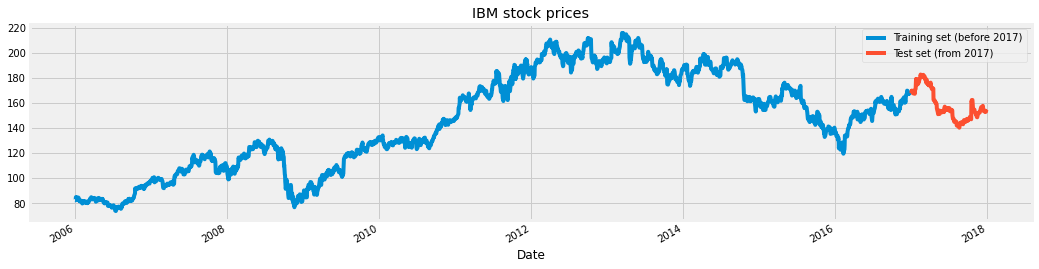

In [ ]:
# visualization of "High" attribute of the dataset

data["High"][:'2016'].plot(figsize=(16,4), legend=True)
data["High"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("IBM stock prices")
plt.show()

In [ ]:
# function which plots ibm stock prices: real and predicted both

def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real IBM stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("IBM stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

In [ ]:
# function which calculates root mean squared error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [ ]:
# scaling the training set

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements

x_train = []
y_train = []

for i in range(60,2769):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train[0]

array([0.06065089, 0.06029868, 0.06311637, 0.0781206 , 0.07262609,
       0.07171034, 0.07657087, 0.07058326, 0.0669907 , 0.06494787,
       0.075796  , 0.07361229, 0.06417301, 0.05621302, 0.05783319,
       0.05409975, 0.05431107, 0.05515638, 0.05543815, 0.05677656,
       0.05846717, 0.05388842, 0.04811214, 0.04233587, 0.04402649,
       0.0490279 , 0.04832347, 0.05297267, 0.05614258, 0.05290223,
       0.05325444, 0.04909834, 0.04994365, 0.04797126, 0.05431107,
       0.05212736, 0.04726684, 0.04895745, 0.04656241, 0.04839391,
       0.04416737, 0.0485348 , 0.04719639, 0.04825303, 0.05395886,
       0.05663567, 0.05853762, 0.05959425, 0.06375035, 0.06917442,
       0.06889265, 0.06670893, 0.06910397, 0.07783883, 0.07565511,
       0.07276698, 0.06889265, 0.0656523 , 0.06656805, 0.06769513])

In [ ]:
y_train[0]

0.06875176105945335

In [ ]:
len(x_train)

2709

In [ ]:
len(y_train)

2709

In [ ]:
x_train.shape

(2709, 60)

In [ ]:
y_train.shape

(2709,)

In [ ]:
# reshaping x_train for efficient modelling

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(2709, 60, 1)

In [ ]:
# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

In [ ]:
# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit to the training set

regressor.fit(x_train, y_train, epochs=5, batch_size=32,verbose=1)

Epoch 1/5
85/85 [==============================] - 9s 112ms/step - loss: 0.0228
Epoch 2/5
85/85 [==============================] - 9s 108ms/step - loss: 0.0101
Epoch 3/5
85/85 [==============================] - 10s 123ms/step - loss: 0.0082
Epoch 4/5
85/85 [==============================] - 10s 119ms/step - loss: 0.0065
Epoch 5/5
85/85 [==============================] - 10s 117ms/step - loss: 0.0064


In [ ]:
score = regressor.evaluate(x_train,y_train, batch_size=32, verbose=1)
print(' Train accuracy:', 1-score)

85/85 [==============================] - 2s 26ms/step - loss: 0.0016
 Train accuracy: 0.9983501543756574


In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2016'], data['High']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(3020,)
(311,)
(311, 1)
(311, 1)


In [ ]:
# preparing x_test

x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# predicting the stock prices for test set

predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

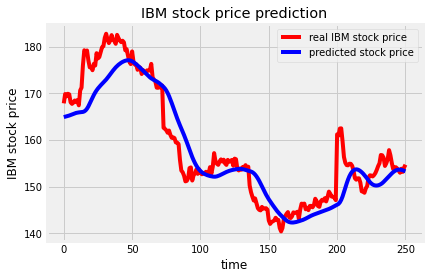

In [ ]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [ ]:
# evaluating the model

return_rmse(test, predicted)

the root mean squared error is : 4.725264108990425.


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [ ]:
# compiling the model

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
19/19 [==============================] - 4s 217ms/step - loss: 0.1025
Epoch 2/5
19/19 [==============================] - 4s 213ms/step - loss: 0.0247
Epoch 3/5
19/19 [==============================] - 4s 221ms/step - loss: 0.0069
Epoch 4/5
19/19 [==============================] - 4s 218ms/step - loss: 0.0048
Epoch 5/5
19/19 [==============================] - 4s 236ms/step - loss: 0.0039


In [ ]:
score = regressorGRU.evaluate(x_train,y_train, batch_size=32, verbose=1)
print(' Train accuracy:', 1-score)

85/85 [==============================] - 2s 24ms/step - loss: 6.9547e-04
 Train accuracy: 0.9993045299197547


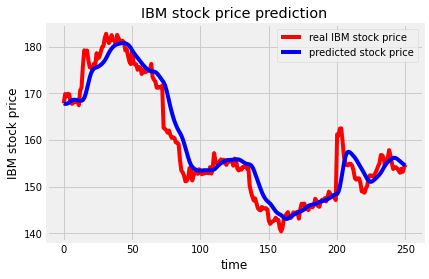

In [ ]:
# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

In [ ]:
# evaluating the model performance

return_rmse(test, predicted_with_gru)

the root mean squared error is : 3.332944153063898.


# HYPOTHESIS TESTING

In [ ]:
df = pd.DataFrame(data['Close'])
df.head()

,Close
Date,
2006-01-03,82.06
2006-01-04,81.95
2006-01-05,82.50
2006-01-06,84.95
2006-01-09,83.73


Daily returns

In [ ]:
#To model returns we will use daily % change
daily_ret = df['Close'].pct_change()
#drop the 1st value - nan
daily_ret.dropna(inplace=True)
#daily %change
daily_ret.head()

Date
2006-01-04   -0.001340
2006-01-05    0.006711
2006-01-06    0.029697
2006-01-09   -0.014361
2006-01-10    0.004061
Name: Close, dtype: float64

### Resampling

Date
2006-01-31    0.039783
2006-02-28    0.029530
2006-03-31    0.022584
2006-04-30    0.037517
2006-05-31    0.019240
Freq: M, Name: Close, dtype: float64


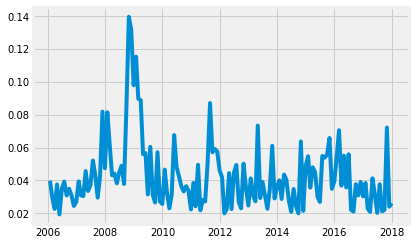

In [ ]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu = daily_ret.resample('M').std()* np.sqrt(12)

print(mnthly_annu.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu)


In [ ]:
#for each year rank each month based on volatility lowest=1 Highest=12
ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()

#average the ranks over all years for each month
final = ranked.groupby(ranked.index.month).mean()

final.describe()

count    12.000000
mean      6.500000
std       1.691109
min       4.666667
25%       5.375000
50%       5.916667
75%       7.666667
max       9.750000
Name: Close, dtype: float64

In [ ]:
#the final average results over 32 years 
final

Date
1     8.916667
2     5.500000
3     4.666667
4     7.500000
5     4.666667
6     5.916667
7     8.166667
8     5.000000
9     5.750000
10    9.750000
11    6.250000
12    5.916667
Name: Close, dtype: float64

### AMVR Plot

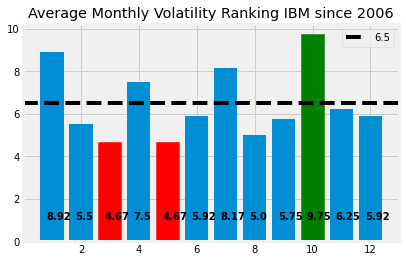

In [ ]:
b_plot = plt.bar(x=final.index,height=final)
b_plot[9].set_color('g')
b_plot[2].set_color('r')
b_plot[4].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking IBM since 2006')

plt.legend()
plt.show()

Testing hypothesis: We wish to test “**whether the observed effect in our data is real or whether it could happen simply by chance**”

Test Statistc: **absolute deviation in AMVR from the mean.**

Null Hypothesis: **there is no seasonality in the data and the observed effect was simply by chance**

Compute a p-value: We do this through **repeated simulation**

In [ ]:
#take abs value move from the mean
#we see march and Oct are the biggest abs moves

fin = abs(final - final.mean())
print(fin.sort_values())
Oct_value = fin[10]
mar_value = fin[3]
print('Extreme march value:', mar_value)
print('Extreme Oct value:', Oct_value)

Date
11    0.250000
6     0.583333
12    0.583333
9     0.750000
2     1.000000
4     1.000000
8     1.500000
7     1.666667
3     1.833333
5     1.833333
1     2.416667
10    3.250000
Name: Close, dtype: float64
Extreme march value: 1.833333333333333
Extreme Oct value: 3.25


## Simulation through Resampling

In [ ]:
#as our Null is that no seasonality exists or alternatively that the month does not matter in terms of AMVR,
#we can shuffle 'date' labels
#for simplicity, we will shuffle the 'daily' return data, which has the same effect as shuffling 'month' labels

#generate null data 

new_df_sim = pd.DataFrame()
highest_only = []

count=0
n=1000
for i in range(n):
    #sample same size as dataset, drop timestamp
    daily_ret_shuffle = daily_ret.sample(3020,replace=True).reset_index(drop=True)
    #add new timestamp to shuffled data
    daily_ret_shuffle.index = (pd.bdate_range(start='2006-01-03',periods=3020))
    
    #then follow same data wrangling as before...
    mnthly_annu = daily_ret_shuffle.resample('M').std()* np.sqrt(12)
    
    ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()
    sim_final = ranked.groupby(ranked.index.month).mean()
    #add each of 1000 sims into df
    new_df_sim = pd.concat([new_df_sim,sim_final],axis=1)
    #also record just highest AMVR for each year (we will use this later for p-hacking explanation)
    maxi_month = max(sim_final)
   
    highest_only.append(maxi_month)
    
#print(sim_final)
#print(highest_only)    
#calculate absolute deviation in AMVR from the mean
all_months = new_df_sim.values.flatten()
mu_all_months = all_months.mean()
abs_all_months = abs(all_months-mu_all_months)    

#calculate absolute deviation in highest only AMVR from the mean
mu_highest = np.mean(highest_only)
abs_highest = [abs(x - mu_all_months) for x in highest_only]

**Significance Testing**

In [ ]:
#count number of months in sim data where ave-vol-rank is >= Oct
#Note: we are using Oct, as Oct has highest absolute deviation from the mean
count=0
for i in abs_all_months:
    if i> Oct_value:
        count+=1
print(count,len(abs_all_months) )        
ans = count/len(abs_all_months)        
print('p-value:', ans )

13 12000
p-value: 0.0010833333333333333


In [ ]:
#same again but just considering highest AMVR for each of 100 trials
count=0
for i in abs_highest:
    if i> Oct_value:
        count+=1
print(count,len(abs_highest) )        
ans = count/len(abs_highest)        
print('p-value:', ans )

9 1000
p-value: 0.009


**Visualising**

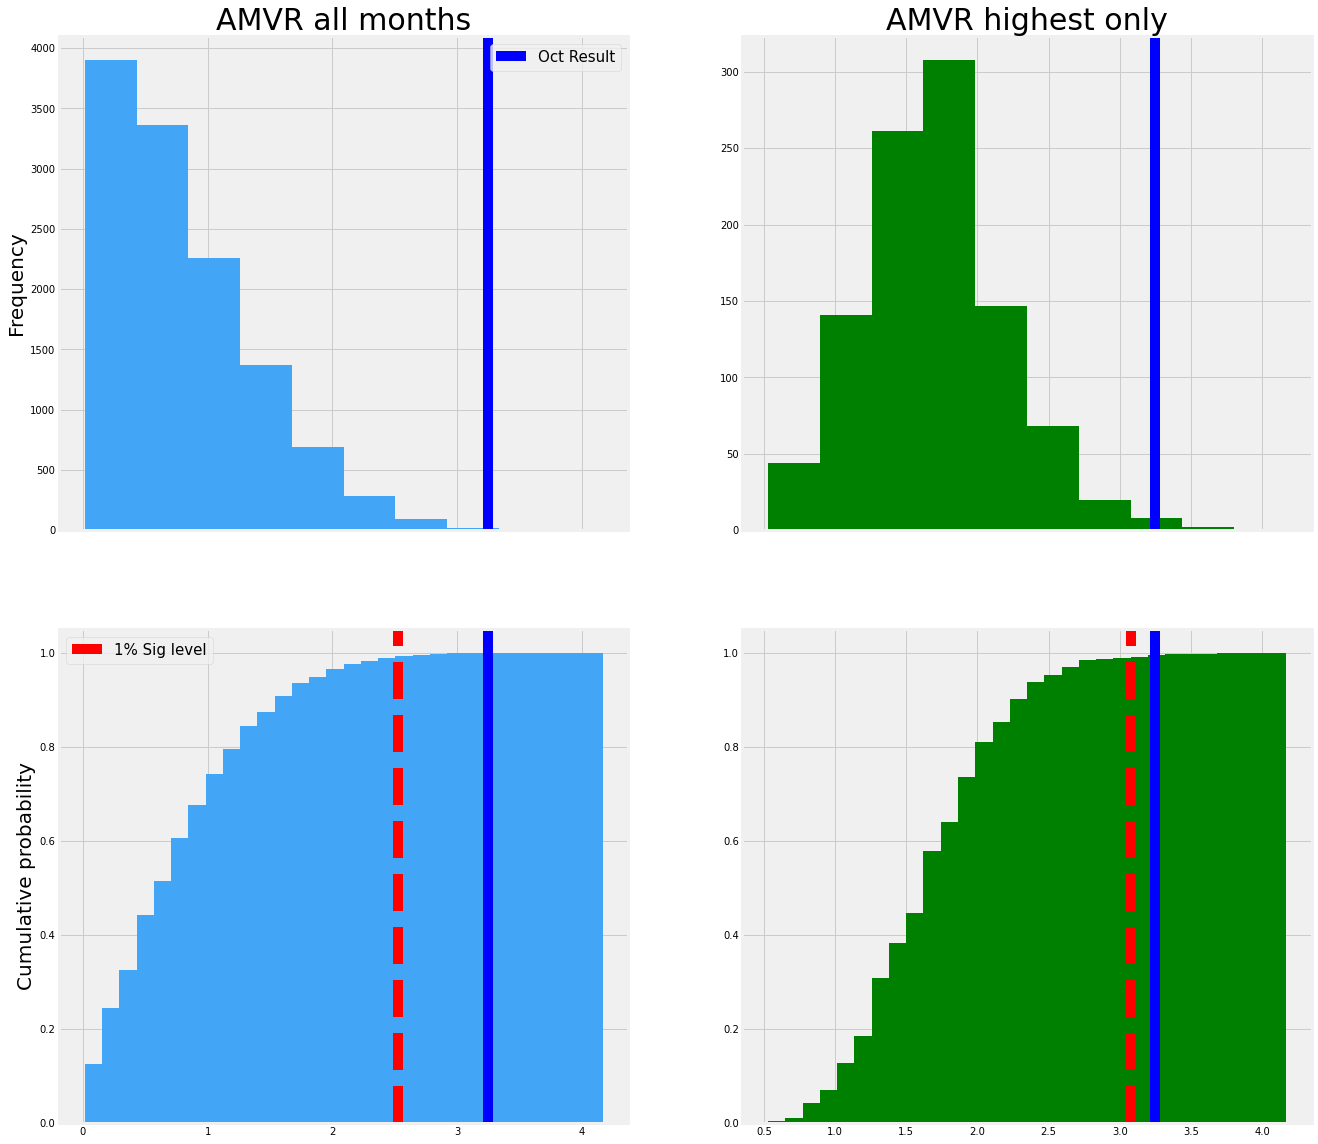

In [ ]:
abs_all_months_95 = np.quantile(abs_all_months,0.99)
abs_highest_95 = np.quantile(abs_highest,0.99)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',figsize=(20,20))

#need to normalize!

#plot 1
ax1.hist(abs_all_months,histtype='bar',color='#42a5f5')
ax1.set_title('AMVR all months',fontsize=30)
ax1.set_ylabel('Frequency',fontsize=20)
n,bins,patches = ax3.hist(abs_all_months,density=1,histtype='bar',cumulative=True,bins=30,color='#42a5f5')
ax3.set_ylabel('Cumulative probability',fontsize=20)
ax1.axvline(Oct_value,color='b',label='Oct Result',lw=10)
ax3.axvline(Oct_value,color='b',lw=10)
ax3.axvline(abs_all_months_95,color='r',ls='--',label='1% Sig level',lw=10)


#plot2
ax2.hist(abs_highest,histtype='bar',color='g')
ax2.set_title('AMVR highest only',fontsize=30)
ax2.axvline(Oct_value,color='b',lw=10)
n,bins,patches = ax4.hist(abs_highest,density=1,histtype='bar',cumulative=True,bins=30,color='g')
ax4.axvline(Oct_value,color='b',lw=10)
ax4.axvline(abs_highest_95,color='r',ls='--',lw=10)

ax1.legend(fontsize=15)
ax3.legend(fontsize=15)

**Result: Null hypothesis is not true. Reject null hypothesis**